# Predicting Air Pollution using Machine Learning

## Data Preparation
### section 1
- download
- load
- visualize
- Normalize data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# load data
data = pd.read_csv('./air_pollution/Data.csv')

data.dropna(inplace = True)
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
# from the above we can see that we have 8 features - X and a target i.e. output y
data = data.values
X = data[:,0:8]
y = data[:,-1]    # get x and y for training purpose
print(X.shape)
#print(X[0:4,:])


(1092, 8)


In [5]:
# Normalize the data
u = np.mean(X,axis = 0)
s = np.std(X,axis = 0)
X = (X-u)/s

<function matplotlib.pyplot.show(close=None, block=None)>

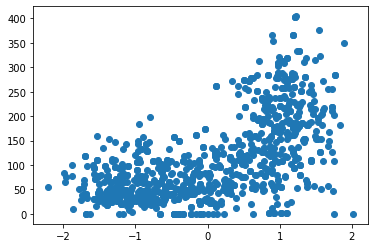

In [6]:
# plot any feature to visualize
plt.scatter(X[:,3],y)   # x for all rows and 3th coloumn/feature data vs y
plt.show                # change the coloumn value fron 3 to any other to visualize that also

### section 2
- apply linear regression on multiple features
- remember: we need to add a coloumn of 1s i.e. x0 before finding hypothesis  =  preprosessing
- for computing theta transpose x

In [7]:
ones = np.ones((X.shape[0],1))  # x.shape[0] means no of rows and we are finding ones for those many rows and 1 coloumn
X = np.hstack((ones,X))         # add 1's coloumn to x as x0
print(ones.shape)
print(X.shape)
print(X[:4,:])                  # print first 4 rows and all columns of x

(1092, 1)
(1092, 9)
[[ 1.         -2.5758334  -3.4040112  -1.97306575  1.26724517  1.91926675
  -2.01150096 -0.63876585 -0.87715776]
 [ 1.         -2.52049852 -2.96903049 -2.02687159  1.38692849  1.53677943
  -1.87771128 -0.61272881 -0.64450561]
 [ 1.         -2.67266943 -2.86403514 -2.29590082  1.5066118   1.21803999
  -1.87771128 -0.50858065 -0.64450561]
 [ 1.         -2.40982877 -2.5490491  -2.17483767  1.41352478  0.58056112
  -1.61013191  0.35064168  0.65560935]]


- X matrix(m x n) means m examples and n features (capital X)
- x vector = single example with n features (small x)

## section 2 
### Building Algorithm from scratch

In [8]:
def hypothesis(x , theta):
    y_ = 0.0
    n = X.shape[1]
    for i in range(n):
        y_ += (theta[i]*x[i])
    return y_

def error(X , y, theta):
    e = 0.0
    m = X.shape[0]
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        e += (y[i]-y_)**2
    return e/m

def gradient(X,y,theta):
    m,n = X.shape
    grad = np.zeros((n,))
    
    # as theta = theta - lr*gradient the length of gradient must be same as theta
    # initialize the gradient with n length
    
    for j in range(n):
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            grad[j] += ((y_-y[i]))*X[i][j]
    return grad/m

def gradient_decent(X,y,lr = 0.1 , max_epochs = 300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)
        
        grad = gradient(X,y,theta)
        
        for j in range(n):
            theta[j]=theta[j]-lr*grad[j]
    return theta,error_list

In [10]:
theta,error_list = gradient_decent(X,y)
print(theta)
#print(error_list)

[109.09098367 -14.36611302   3.04197766 -31.30344383   1.66840571
 -18.70124343 -28.93495521  -8.33040911   3.48448935]
[19028.779025281747, 14538.698338759858, 12029.461267995392, 10301.60946096948, 8983.222345849064, 7935.7787998561635, 7091.293753585494, 6406.74780701365, 5850.599330567926, 5398.21766130638, 5029.912837552269, 4729.811785845137, 4485.0783704697205, 4285.3185999629895, 4122.109995810282, 3988.6241807335155, 3879.32273266939, 3789.7116008708713, 3716.1426223157573, 3655.6530131389613, 3605.835513123396, 3564.7332900245974, 3530.7548535943433, 3502.6051472862914, 3479.229724386973, 3459.7695103917567, 3443.524133147463, 3429.922189225024, 3418.4971272716434, 3408.8676812501694, 3400.7219901691115, 3393.8047055197767, 3387.9065207132076, 3382.8556644276246, 3378.5109868320565, 3374.756338093783, 3371.4959955899076, 3368.6509423994758, 3366.15583702638, 3363.956544573884, 3362.008124112728, 3360.2731868533433, 3358.720555833936, 3357.324170887558, 3356.0621932317995, 335

### predictions

In [9]:
y_ = []
m = X.shape[0]
for i in range(m):
    pred = hypothesis(X[i],theta)
    y_.append(pred)
y_ = np.array(y_)

def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y-y.mean())**2)
    score = 1-(num/denom)
    return score*100

In [10]:
r2_score(y,y_)

53.36214994126951

In [11]:
a = [1,1,1,1,1,1,1,1,1]
predict = hypothesis(a,theta)
print(predict)

15.649691776100418


# till now we have learned from scratch
# Now let us build models using sk learn so that we can deploy these on web
# First model 

## inputs to be given
- Average Temperature
- Maximum Temperature
- Min Temp
- Atmospheric pressure at sea level
- Average relative humidity
- Avg visibility
- Avg wind speed
- Maximum sustained wind speed

In [11]:
data = pd.read_csv('./air_pollution/Data.csv')
data.dropna(inplace = True)
data = data.values
X = data[:,0:8]
y = data[:,-1]

In [13]:
#implementing same thing using sk learn , to save this file and do predictions and deploy to web
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state = 5)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_val, y_val))

0.5201420703969563
0.6437872575638027


In [14]:
#create a pkl file to do predictions directly
# this bascically saves the model ready to do predictions

import joblib
joblib.dump(lr,"model1.pkl")

model1 = joblib.load('model1.pkl')
model1.predict([[27,36,24,29.64,84,3,22,9]])[0]   # jharsuguda data


-6.517698521377952

In [120]:
c = model1.predict([[27,36,24,29.64,84,3,22,9]]) 
c[0]

-6.517698521377952

# Let us do this for predicting another another input
# second model

## inputs to be given
- PM2.5
- PM10
- NO2
- NH3
- SO2
- CO
- OZONE
- output = AQI

In [15]:
data = pd.read_csv('./air_pollution/RAW_DATASET_state_weather_aqi_data.csv')
data.head()

,state,city,station,date,time,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI,Predominant_Parameter
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",03-01-2020,10:00:00,68.0,64.0,17.0,4.0,28.0,31.0,40.0,68.0,PM2.5
1,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",03-01-2020,10:00:00,67.0,70.0,23.0,2.0,13.0,49.0,77.0,77.0,OZONE
2,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",03-01-2020,10:00:00,32.0,NaN,26.0,5.0,6.0,19.0,16.0,32.0,PM2.5
3,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",03-01-2020,10:00:00,93.0,93.0,31.0,3.0,9.0,57.0,61.0,93.0,PM10
4,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",05-01-2020,06:00:00,60.0,55.0,20.0,5.0,18.0,29.0,53.0,60.0,PM2.5


- we dont require state , city , station , date and time and predominant parameter as well
- features extraction , we have to take only reamining

In [16]:
data.dropna(inplace = True)          # drop nan , as nan are not useful in ml
data.head()

,state,city,station,date,time,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI,Predominant_Parameter
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",03-01-2020,10:00:00,68.0,64.0,17.0,4.0,28.0,31.0,40.0,68.0,PM2.5
1,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",03-01-2020,10:00:00,67.0,70.0,23.0,2.0,13.0,49.0,77.0,77.0,OZONE
3,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",03-01-2020,10:00:00,93.0,93.0,31.0,3.0,9.0,57.0,61.0,93.0,PM10
4,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",05-01-2020,06:00:00,60.0,55.0,20.0,5.0,18.0,29.0,53.0,60.0,PM2.5
5,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",05-01-2020,06:00:00,48.0,52.0,25.0,3.0,12.0,43.0,67.0,67.0,OZONE


In [17]:
data = data.values       # removing the last coloumn
data = data[:,0:13]
print(data[0:1,:])

[['Andhra_Pradesh' 'Amaravati' 'Secretariat, Amaravati - APPCB'
  '03-01-2020' '10:00:00' 68.0 64.0 17.0 4.0 28.0 31.0 40.0 68.0]]


In [18]:
X = data[:,5:12]     # taking x from oloumn 5 to 12  
y = data[:,-1]       # taking y as last coloumn = output
print(X[0:4,:])
print(X.shape)
print(y.shape)

[[68.0 64.0 17.0 4.0 28.0 31.0 40.0]
 [67.0 70.0 23.0 2.0 13.0 49.0 77.0]
 [93.0 93.0 31.0 3.0 9.0 57.0 61.0]
 [60.0 55.0 20.0 5.0 18.0 29.0 53.0]]
(967, 7)
(967,)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state = 5)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_val, y_val))

0.9816281438824661
0.97859130292591


In [22]:
hist = lr.predict(X_val)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_val,hist)

183.9119844635948

### very good score !

In [104]:
#create a pkl file to do predictions directly
# this bascically saves the model ready to do predictions

import joblib
joblib.dump(lr,"model2.pkl")

model2 = joblib.load('model2.pkl')
model2.predict([[27.87,61,10.5,17.8,5.7,20.0,17.8]])   # jharsuguda data

array([44.57815757])

In [105]:
#answer is displayed in array form
p = model2.predict([[27.87,61,10.5,17.8,5.7,20.0,17.8]])
p[0]

44.57815756915067

# Both models are now ready to be deployed on web

### references
- https://cambridgemask.com/blogs/news/6-things-you-need-to-know-about-pm2-5